In [261]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LinearRegression as LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

This notebook is a look into feature importance of the convoy data. PCA Analysis, Random Forest Classifier feature importance, and Gradient Boosting Classifier feature importance are performed.


In [262]:
df = pd.read_csv('Complete_Convoy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])

In [263]:
df2 = df[df['Time At Sea (Days)'] > 10]
df2 = df2.drop(columns=['Convoy Number', 'Number of Ships Sunk', 'Depart_Date', 'Arrival/Dispersal Date', 'Number of Escorts Sunk', \
                         'Number of Stragglers Sunk', 'Total Tons of Ships Sunk', 'Escort Sink Percentage', 'Straggler Sink Percentage'])
                        #Remove features that leak data or are irrelevant 
df2.reset_index(drop=True)
df2['High Risk'] = (df2['Overall Sink Percentage'] > 0).astype(int)

In [264]:
X = np.array(df2.drop(columns=['Overall Sink Percentage', 'High Risk']))
y = df2['High Risk'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1945)
(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

((702, 11), (176, 11), (702,), (176,))

In [265]:
#Standard Scaler
SS = SS()

In [266]:
df2

,Number of Ships,Number of Escort Ships,Number of Stragglers,Total Tons of Convoy,Overall Sink Percentage,Avg Number of U-Boats in Atlantic,Escort Ratio,Time At Sea (Days),Month,Year,Previous Month Avg Sink %,Approx. Sighting Range,High Risk
5,22.0,4.0,0.0,99182.0,0.0,6.0,0.181818,14.0,9.0,1939.0,0.000000,22.030458,0
9,19.0,4.0,0.0,93630.0,0.0,6.0,0.210526,17.0,9.0,1939.0,0.000000,21.298297,0
13,4.0,0.0,0.0,17868.0,0.0,6.0,0.000000,15.0,9.0,1939.0,0.000000,10.878000,0
14,27.0,3.0,0.0,131859.0,0.0,6.0,0.111111,14.0,9.0,1939.0,0.000000,22.837005,0
18,13.0,3.0,0.0,51562.0,0.0,3.0,0.230769,14.0,10.0,1939.0,0.000000,18.916268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,85.0,15.0,0.0,511572.0,0.0,0.0,0.176471,15.0,5.0,1945.0,0.098328,23.997420,0
1170,30.0,9.0,0.0,103961.0,0.0,0.0,0.300000,14.0,5.0,1945.0,0.098328,23.152177,0
1171,82.0,23.0,0.0,406154.0,0.0,0.0,0.280488,14.0,5.0,1945.0,0.098328,23.996461,0
1172,43.0,12.0,0.0,210127.0,0.0,0.0,0.279070,13.0,5.0,1945.0,0.098328,23.784495,0


In [267]:
X_scaled = SS.fit_transform(df2.drop(columns =['High Risk', 'Overall Sink Percentage']))

In [268]:
#Preform PCA 
pca = PCA()
PCA_X= pca.fit_transform(X_scaled)
PCA_X_df = pd.DataFrame(PCA_X[:,:2], columns = ['PC1','PC2'])
PCA_X_df['High Risk'] = df2['High Risk']
print(pca.explained_variance_ratio_)

[0.30715904 0.16975115 0.11653695 0.10583948 0.07846915 0.07141338
 0.06100088 0.05527786 0.02497971 0.00694364 0.00262876]


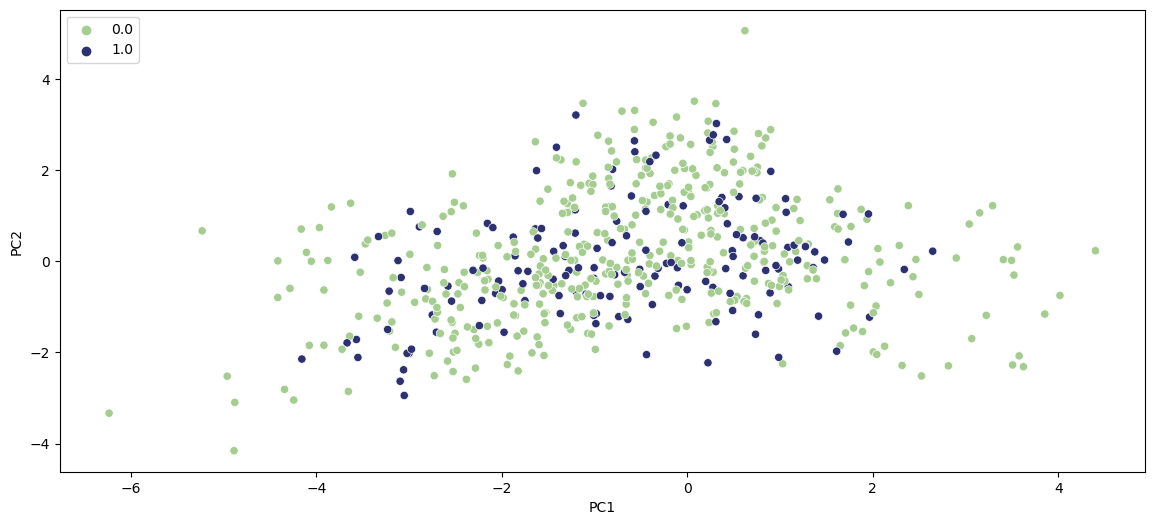

In [269]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=PCA_X_df, x='PC1', y='PC2', hue='High Risk', palette='crest')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left')
plt.show()

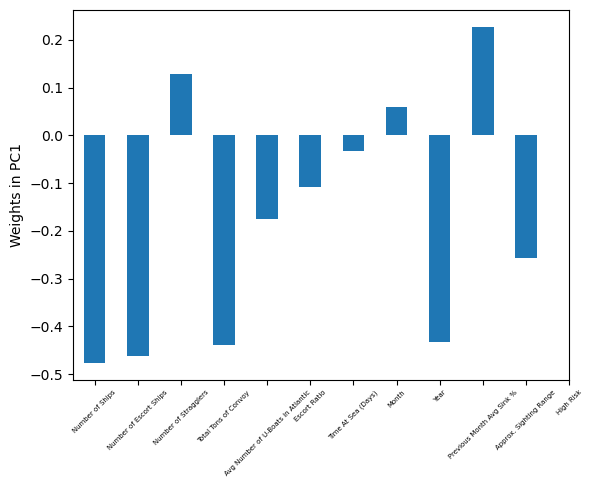

0    -0.476040
1    -0.461293
2     0.129192
3    -0.438515
4    -0.175448
5    -0.108506
6    -0.032910
7     0.060469
8    -0.432228
9     0.227472
10   -0.256418
dtype: float64


In [270]:
pca_component_1 = pd.Series(pca.components_[0])
pca_component_1.plot.bar()
labels = df2.drop(columns='Overall Sink Percentage').columns
plt.xticks(range(len(labels)), labels, fontsize=5, rotation=45)
plt.ylabel('Weights in PC1')
plt.show()
print(pca_component_1)

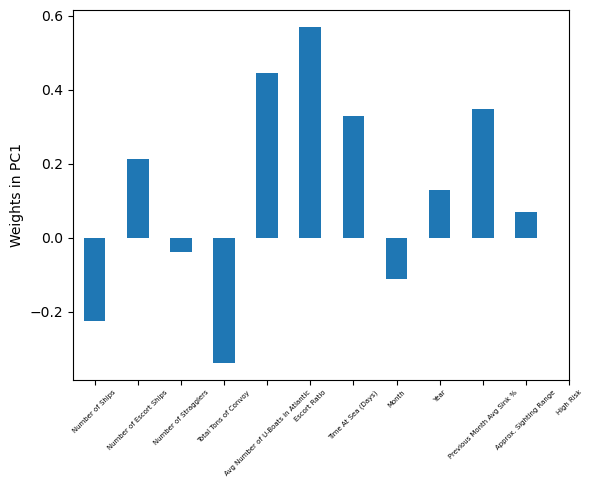

0    -0.224493
1     0.212486
2    -0.037722
3    -0.338435
4     0.446404
5     0.570214
6     0.329128
7    -0.112399
8     0.129654
9     0.348539
10    0.069445
dtype: float64


In [271]:
pca_component_2 = pd.Series(pca.components_[1])
pca_component_2.plot.bar()
labels = df2.drop(columns='Overall Sink Percentage').columns
plt.xticks(range(len(labels)), labels, fontsize=5, rotation=45)
plt.ylabel('Weights in PC1')
plt.show()
print(pca_component_2)

In [272]:
X_names = ['Number of Ships', 'Number of Escort Ships', 'Number of Stragglers', 'Total Tons of Convoy', \
           'Avg Number of U-Boats in Atlantic',	'Escort Ratio',	'Time At Sea (Days)', 'Month', 'Year', 'Previous Month Avg Sink %', \
            'Approx. Sighting Range']
y_names = ['Overall Sink Rate']

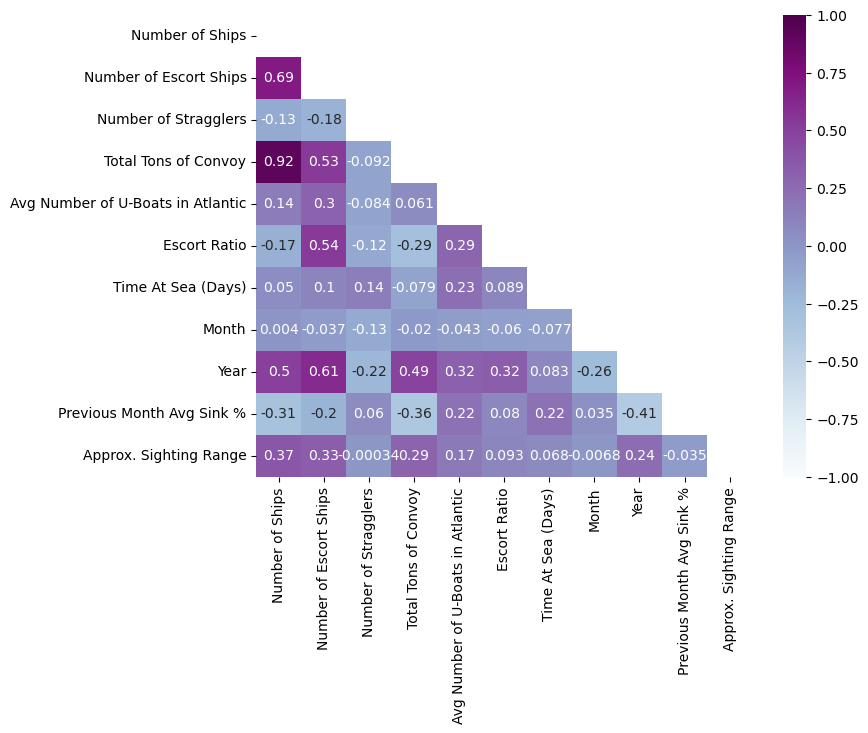

In [273]:
plt.figure(figsize = [8,6])
X_df = pd.DataFrame(X, columns = X_names)
mask = np.triu(X_df.corr())
sns.heatmap(X_df.corr(), mask = mask, cmap = 'BuPu', vmin = -1,
           vmax = 1, annot = True)
plt.show()

In [274]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1945)

In [275]:
#unsup
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_X = pca.fit_transform(SS.fit_transform(Xtrain))
print('PCA Explained Variance Ratio:' ,pca.explained_variance_ratio_)

PCA Explained Variance Ratio: [0.30587463 0.17011813]


In [276]:
pd.DataFrame(pca.components_.T, index = X_names).sort_values(0,ascending = False)

,0,1
Previous Month Avg Sink %,0.210337,0.397269
Number of Stragglers,0.121810,-0.023682
Month,0.063475,-0.078087
Time At Sea (Days),-0.033484,0.352117
Escort Ratio,-0.118107,0.552308
Avg Number of U-Boats in Atlantic,-0.189632,0.433301
Approx. Sighting Range,-0.255484,0.086682
Year,-0.434894,0.096607
Total Tons of Convoy,-0.437297,-0.333664
Number of Escort Ships,-0.460025,0.215052


In [277]:
pd.DataFrame(pca.components_.T, index = X_names).sort_values(1,ascending = False)

,0,1
Escort Ratio,-0.118107,0.552308
Avg Number of U-Boats in Atlantic,-0.189632,0.433301
Previous Month Avg Sink %,0.210337,0.397269
Time At Sea (Days),-0.033484,0.352117
Number of Escort Ships,-0.460025,0.215052
Year,-0.434894,0.096607
Approx. Sighting Range,-0.255484,0.086682
Number of Stragglers,0.121810,-0.023682
Month,0.063475,-0.078087
Number of Ships,-0.478126,-0.210507


Feature Analysis For Random Forest Classifier:

In [278]:
#Grid Search For Random Forest Classifier Params
param_grid = dict(n_estimators=[50, 100, 200, 300, 400, 500], max_features=['sqrt', 0.5, 'auto'], min_samples_split=[2, 3, 4, 5, 10, 15, 20]) #Params to test
cv = KFold(n_splits=10, random_state=1945, shuffle = True)
grid = GridSearchCV(RFC(), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=1945, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 0.5, 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [279]:
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')

The best parameters are {'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 400} with a score of 0.85


In [280]:
pd.DataFrame(grid.cv_results_)[['param_n_estimators','param_max_features','param_min_samples_split','mean_test_score','rank_test_score']]

,param_n_estimators,param_max_features,param_min_samples_split,mean_test_score,rank_test_score
0,50,sqrt,2,0.831791,109
1,100,sqrt,2,0.833260,99
2,200,sqrt,2,0.833219,102
3,300,sqrt,2,0.841791,32
4,400,sqrt,2,0.836097,71
...,...,...,...,...,...
121,100,auto,20,0.844648,17
122,200,auto,20,0.846056,13
123,300,auto,20,0.848913,2
124,400,auto,20,0.848913,2


In [281]:
Random_Forest_Classifier = RFC(max_features='sqrt', min_samples_split=20, n_estimators=400, random_state=1945) #Using optimized params
Random_Forest_Classifier.fit(Xtrain, ytrain)
ypredict = Random_Forest_Classifier.predict(Xtest)
Ran_For_mse = mean_squared_error(ytest, ypredict)
Classification_Report = classification_report(ytest, ypredict)
print('Random Forest Train Score (Mean Accuracy):', Random_Forest_Classifier.score(Xtrain, ytrain))
print('Random Forest Test Score (Mean Accuracy):', Random_Forest_Classifier.score(Xtest, ytest))
print('Random Forest Mean Squared Error', Ran_For_mse)
print('Random Forest Classifier Report: \n', Classification_Report)

Random Forest Train Score (Mean Accuracy): 0.8945868945868946
Random Forest Test Score (Mean Accuracy): 0.8465909090909091
Random Forest Mean Squared Error 0.1534090909090909
Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       141
           1       0.72      0.37      0.49        35

    accuracy                           0.85       176
   macro avg       0.79      0.67      0.70       176
weighted avg       0.83      0.85      0.83       176



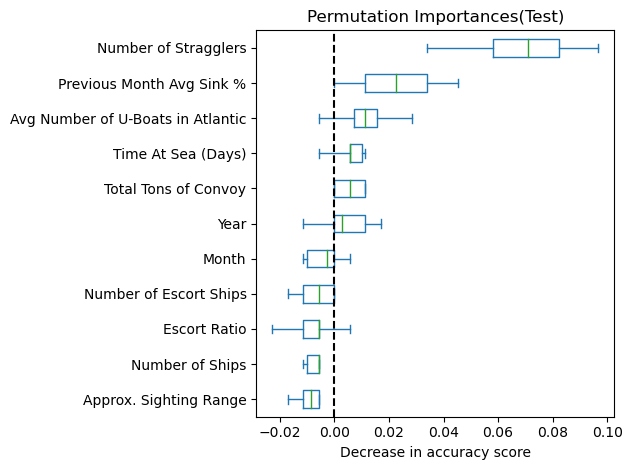

In [282]:
result = permutation_importance(Random_Forest_Classifier, Xtest, ytest, n_repeats=10, random_state=1945, n_jobs=2)
X_df = pd.DataFrame(Xtest, columns = X_names)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T, columns=X_df.columns[sorted_importances_idx])
ax = importances.plot.box(vert=False, whis=10)
ax.set_title('Permutation Importances(Test)')
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlabel('Decrease in accuracy score')
ax.figure.tight_layout()

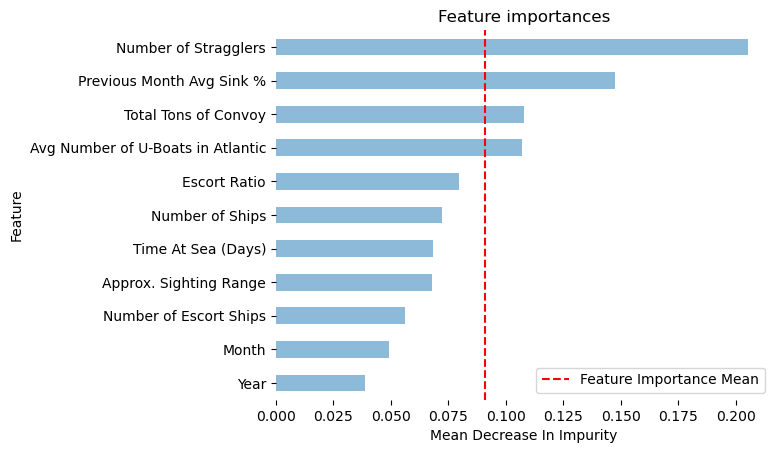

In [283]:
forest_importances = pd.Series(Random_Forest_Classifier.feature_importances_,  X_names)
filtered = forest_importances[forest_importances > 0].sort_values()[-15:]
fig, ax = plt.subplots()
filtered.plot.barh(ax=ax, alpha = 0.5, label='_nolegend_')
plt.axvline(forest_importances.mean(), c='red', linestyle ='--', label='Feature Importance Mean')
ax.set_title('Feature importances')
ax.set_ylabel('Feature')
ax.set_xlabel('Mean Decrease In Impurity')
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.legend(loc='lower right')
plt.show()

Optimal number of features: 9


/Users/matthewplambeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


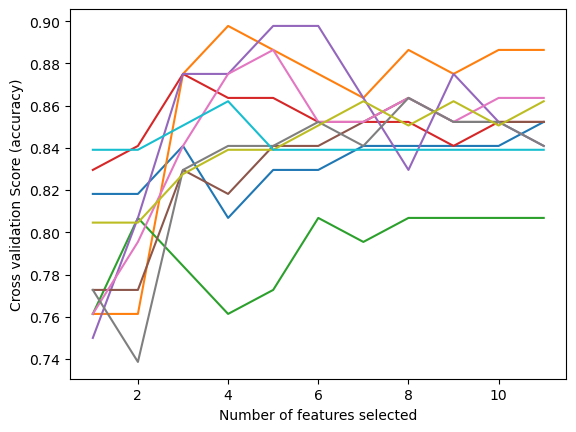

In [284]:
#RFECV
Random_Forest_Classifier = RFC(max_features='sqrt', min_samples_split=20, n_estimators=400, oob_score=True, random_state=1945) #Same params as before
min_features_to_select = 1 
rfecv = RFECV(estimator=Random_Forest_Classifier, step=1, cv=KFold(n_splits=10, random_state=1945, shuffle = True), \
    scoring='accuracy', min_features_to_select=min_features_to_select,)
rfecv.fit(X, y)
print('Optimal number of features: %d' % rfecv.n_features_)
#Plot
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation Score (accuracy)')
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

In [285]:
print('RFECV Score:',rfecv.score(X, y))

RFECV Score: 0.8986332574031891


In [286]:
print('Feature Rankings:\n')
print(pd.Series(rfecv.ranking_, X_names).sort_values())

Feature Rankings:

Number of Ships                      1
Number of Escort Ships               1
Number of Stragglers                 1
Total Tons of Convoy                 1
Avg Number of U-Boats in Atlantic    1
Escort Ratio                         1
Time At Sea (Days)                   1
Previous Month Avg Sink %            1
Approx. Sighting Range               1
Year                                 2
Month                                3
dtype: int64


Feature Analysis For Gradient Boosting Classifier:

In [287]:
param_grid_2 = dict(n_estimators=[50, 100, 200, 300, 400, 500], max_features=['sqrt', 0.5, 'log2'], min_samples_split=[2, 5, 10, 15, 20],  
                  max_depth=[1, 3, 5]) #Params to test
cv_2 = KFold(n_splits=10, random_state=1945, shuffle = True)
grid_2 = GridSearchCV(GBC(), param_grid=param_grid_2, cv=cv_2, scoring='accuracy')
grid_2.fit(Xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=1945, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': ['sqrt', 0.5, 'log2'],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [288]:
print(f'The best parameters are {grid_2.best_params_} with a score of {grid_2.best_score_:.2f}')

The best parameters are {'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 50} with a score of 0.85


In [289]:
pd.DataFrame(grid_2.cv_results_)[['param_n_estimators','param_max_features','param_min_samples_split', 'param_max_depth', 'mean_test_score','rank_test_score']]

,param_n_estimators,param_max_features,param_min_samples_split,param_max_depth,mean_test_score,rank_test_score
0,50,sqrt,2,1,0.824668,183
1,100,sqrt,2,1,0.837485,91
2,200,sqrt,2,1,0.844668,32
3,300,sqrt,2,1,0.846117,12
4,400,sqrt,2,1,0.844708,26
...,...,...,...,...,...,...
265,100,log2,20,5,0.828974,132
266,200,log2,20,5,0.819014,237
267,300,log2,20,5,0.823340,191
268,400,log2,20,5,0.823360,190


In [290]:
Gradien_Boosting_Classifier = GBC(max_features=0.5, min_samples_split=15, n_estimators=50, max_depth=3, random_state=1945) #Using optimized params
Gradien_Boosting_Classifier.fit(Xtrain, ytrain)
ypredict = Gradien_Boosting_Classifier.predict(Xtest)
GBC_mse = mean_squared_error(ytest, ypredict)
Classification_Report_2 = classification_report(ytest, ypredict)
print('Random Forest Train Score (Mean Accuracy):', Gradien_Boosting_Classifier.score(Xtrain, ytrain))
print('Random Forest Test Score (Mean Accuracy):', Gradien_Boosting_Classifier.score(Xtest, ytest))
print('Random Forest Mean Squared Error', GBC_mse)
print('Random Forest Classifier Report: \n', Classification_Report_2)

Random Forest Train Score (Mean Accuracy): 0.9017094017094017
Random Forest Test Score (Mean Accuracy): 0.8522727272727273
Random Forest Mean Squared Error 0.14772727272727273
Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       141
           1       0.71      0.43      0.54        35

    accuracy                           0.85       176
   macro avg       0.79      0.69      0.72       176
weighted avg       0.84      0.85      0.84       176



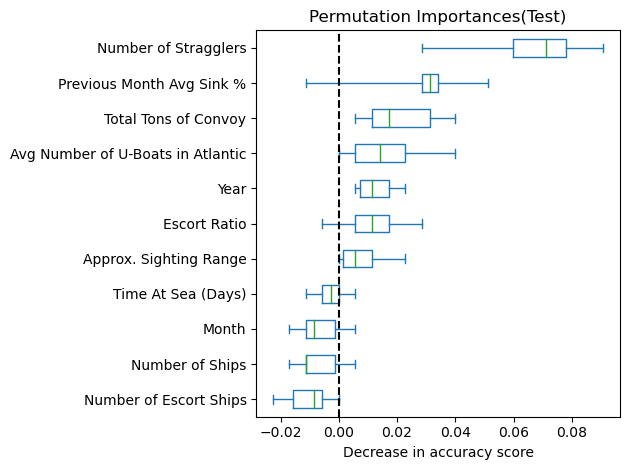

In [291]:
result = permutation_importance(Gradien_Boosting_Classifier, Xtest, ytest, n_repeats=10, random_state=1945, n_jobs=2)
X_df = pd.DataFrame(Xtest, columns = X_names)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T, columns=X_df.columns[sorted_importances_idx])
ax = importances.plot.box(vert=False, whis=10)
ax.set_title('Permutation Importances(Test)')
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlabel('Decrease in accuracy score')
ax.figure.tight_layout()

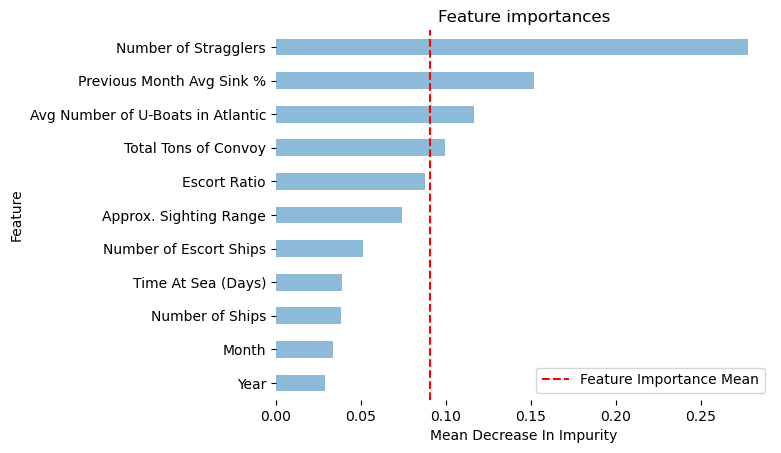

In [292]:
GBC_importances = pd.Series(Gradien_Boosting_Classifier.feature_importances_, X_names)
filtered = GBC_importances[GBC_importances > 0].sort_values()[-15:]
fig, ax = plt.subplots()
filtered.plot.barh(ax=ax, alpha = 0.5, label='_nolegend_')
plt.axvline(GBC_importances.mean(), c='red', linestyle ='--', label='Feature Importance Mean')
ax.set_title('Feature importances')
ax.set_ylabel('Feature')
ax.set_xlabel('Mean Decrease In Impurity')
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.legend(loc='lower right')
plt.show()

Optimal number of features: 9


/Users/matthewplambeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


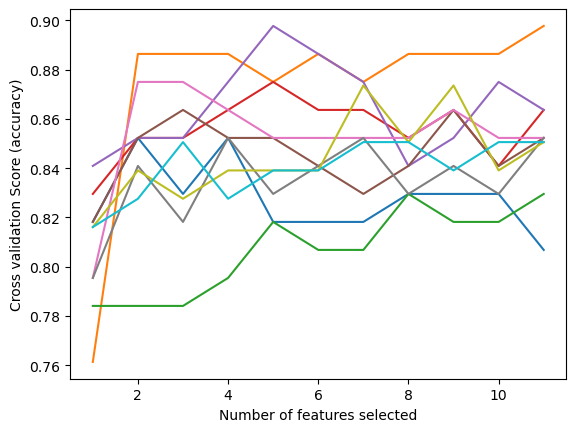

In [293]:
#RFECV
Gradien_Boosting_Classifier = GBC(max_features=0.5, min_samples_split=15, n_estimators=50, max_depth=3, random_state=1945) #Using optimized params
min_features_to_select = 1 
rfecv_2 = RFECV(estimator=Gradien_Boosting_Classifier, step=1, cv=KFold(n_splits=10, random_state=1945, shuffle = True), \
    scoring='accuracy', min_features_to_select=min_features_to_select,)
rfecv_2.fit(X, y)
print('Optimal number of features: %d' % rfecv_2.n_features_)
#Plot
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation Score (accuracy)')
plt.plot(range(min_features_to_select, len(rfecv_2.grid_scores_) + min_features_to_select), rfecv_2.grid_scores_)
plt.show()

In [294]:
print('RFECV Score:', rfecv_2.score(X, y))


RFECV Score: 0.8986332574031891


In [295]:
print('Feature Rankings:\n')
print(pd.Series(rfecv_2.ranking_, X_names).sort_values())

Feature Rankings:

Number of Escort Ships               1
Number of Stragglers                 1
Total Tons of Convoy                 1
Avg Number of U-Boats in Atlantic    1
Escort Ratio                         1
Time At Sea (Days)                   1
Year                                 1
Previous Month Avg Sink %            1
Approx. Sighting Range               1
Number of Ships                      2
Month                                3
dtype: int64
